In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys

#Combining rotation matrices

[[ 0.35  0.35  0.87]
 [ 0.61  0.61 -0.5 ]
 [-0.71  0.71  0.  ]]


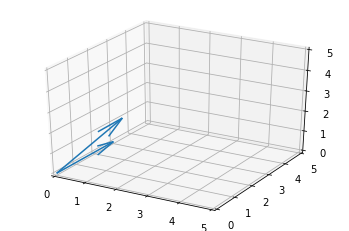

In [41]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_zlim([0,5])

v1 = np.array([0,3,0])    #base vector


phi = 3.14/2 #Rx(phi)
rot_x = np.array([[1,                 0,                0],
                  [0,   math.cos(phi),     -math.sin(phi)],
                  [0,   math.sin(phi),      math.cos(phi)]]) #Rotation matrix (pi/2) about X

theta = 3.14/4 #Ry(theta)
rot_y = np.array([[math.cos(theta),  0, math.sin(theta)],
                  [0,                1,               0],
                  [-math.sin(theta), 0, math.cos(theta)]]) #Rotation matrix (pi/4 rad) about Y


psi = 3.14/3 #Rz(psi)
rot_z = np.array([[math.cos(psi), -math.sin(psi), 0],
                  [math.sin(psi),  math.cos(psi), 0],
                  [0,                          0, 1]])     #Rotation matrix (pi/3 rad) about Z

r = np.dot(rot_z, rot_y) #combined rot matrix, 1st rotation about X, 2nd about Y
R = np.dot(r, rot_x) #combined rot matrix, rotation about X


v1_R = np.dot(R,v1) #rotation applied

ax.quiver(0,0,0, v1[0],v1[1],v1[2])
ax.quiver(0,0,0, v1_R[0], v1_R[1], v1_R[2])

print(np.round(R,decimals=2))

#Rotation Matrix -> Euler angles
Order of rotation xyz

In [42]:
tol = sys.float_info.epsilon * 10
  
if abs(R.item(0,0))< tol and abs(R.item(1,0)) < tol:
   eul1 = 0
   eul2 = math.atan2(-R.item(2,0), R.item(0,0))
   eul3 = math.atan2(-R.item(1,2), R.item(1,1))
   print('0')
else:   
   print('1')
   eul1 = math.atan2(R.item(1,0),R.item(0,0))
   sp = math.sin(eul1)
   cp = math.cos(eul1)
   eul2 = math.atan2(-R.item(2,0),cp*R.item(0,0)+sp*R.item(1,0))
   eul3 = math.atan2(sp*R.item(0,2)-cp*R.item(1,2),cp*R.item(1,1)-sp*R.item(0,1))

print("phi (Rx) =", (eul3*180)/math.pi)  
print("theta (Ry)  =", (eul2*180)/math.pi)
print("psi (Rz) =", (eul1*180)/math.pi)

1
phi (Rx) = 89.95437383553926
theta (Ry)  = 44.97718691776963
psi (Rz) = 59.969582557026165


#Euler angles -> Rotation matrix

In [40]:
phi = 3.14/2     #x
theta = 3.14/4   #y
psi = 3.14/3     #z

r_x = [[1,             0,              0],
       [0, math.cos(phi), -math.sin(phi)],
       [0, math.sin(phi),  math.cos(phi)]]

r_y = [[math.cos(theta),  0, math.sin(theta)],
       [0,                1,               0],
       [-math.sin(theta), 0, math.cos(theta)]]

r_z = [[math.cos(psi), -math.sin(psi), 0],
       [math.sin(psi),  math.cos(psi), 0],
       [0,                          0, 1]]

R_1 = np.dot(r_z,r_y)
R = np.dot(R_1,r_x)
print(np.round(R, decimals=2))

[[ 0.35  0.35  0.87]
 [ 0.61  0.61 -0.5 ]
 [-0.71  0.71  0.  ]]
